1: What is anomaly detection? explain its types (point , contexual, and collectiove anomlies)with examples


ans-

    Anomaly Detection identifies rare data points/patterns deviating from
    
    normal, crucial for fraud, system failures, or threats, categorized into
    
    Point (single outlier), Contextual (normal in one setting, abnormal in
    
    another), and Collective (group acting abnormally) anomalies, each
    
    signaling different issues like a sudden transaction (point), high energy
    
    use at night (contextual), or multiple simultaneous system errors
    
    (collective)

 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.


ans - Comparison of Anomaly Detection Algorithms

**Isolation Forest (IF)**


**How it works:**

    Builds random trees. Anomalies are few and far apart,
    
    so they get isolated (fewer splits) faster than normal points.


**Best for:**  


    High-dimensional data, very large datasets, detecting global outliers
    
    (points far from everything else).


**Use Cases:**

    Fraud detection, system health monitoring where a sudden, unique event stands out.



---


**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**


**How it works:**

    Finds dense regions (clusters) and labels points in low-density areas as noise (outliers).


**Best for:**

    Discovering clusters of arbitrary shapes, identifying noise points in noisy data.


**Use Cases:**

    Geographic data analysis (finding hot spots and isolated points), sensor networks.


---

**Local Outlier Factor (LOF)**


**How it works**:

    Measures how much "less dense" a point is compared to its neighbors; high score means it's an outlier.


**Best for:**

    Finding local outliers (points that are outliers relative to their
    
    neighborhood, not the whole dataset).


**Use Cases:**

    Detecting subtle anomalies in complex datasets where density varies, like
    
    network intrusion detection.



 3: What are the key components of a Time Series? Explain each with one
example.

ans-

*A time series has four main components—Trend, Seasonality, Cyclicality, and Irregularity (Noise)*


**Here's an explanation of each component with examples:**


**Trend (T):**       
    The long-term upward or downward movement in the data, indicating a general
    
    direction over many years.

**Example:**

    The consistent rise in global population over decades.




---


**Seasonality (S):**

    Short-term, predictable patterns that repeat over fixed intervals, like
    
    days, weeks, months, or seasons.

**Example:**

    Increased retail sales every December due to the holidays, or higher
    
    electricity usage during hot summer months.



---


**Cyclicality (C):**

    Fluctuations that repeat but over longer, less predictable periods than
    
    seasonality (often several years), like business cycles.


**Example:**

    Periods of economic expansion followed by recessions in the stock market or housing prices.



---


**Irregularity/Noise (I):**

    Unpredictable, random variations in the data that can't be explained by
    
    trend, seasonality, or cycles, often due to unique events.


**Example:**

    A sudden dip in a company's stock price caused by an unexpected lawsuit or
    
    a natural disaster.

4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

ans-

    A stationary time series has constant statistical properties (mean,
    
    variance, autocorrelation) over time, making it stable for forecasting,
    
    while a non-stationary series changes (trend, seasonality).


---



    You test stationarity visually (plots) or with tests (ADF, KPSS) and
    
    transform non-stationary data primarily through differencing (subtracting
    
    past values) or seasonal differencing to remove trends/patterns and achieve
    
    stationarity.


5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

ans-

1 **AR (Autoregressive) Model Structure:**

    Predicts future values based only on past observed values of the series
    
    (e.g., (Y_{t}depends on \(Y_{t-1},Y_{t-2}\)). Defined by order \(p\) (AR
     
    (p)).Application: Simple forecasting for stationary series where past
     
    values strongly influence the future (e.g., short-term stock prices, basic trends).


---


   
2  **MA (Moving Average) Model Structure:**

    Predicts future values based only on past forecast errors (shocks/
    
    innovations). Defined by order \(q\) (MA(q)).Application: Captures random
    
    shocks or noise in data, useful when recent errors predict future behavior.
   

---


   
3 **ARIMA (Autoregressive Integrated Moving Average) Model Structure**:

    Combines AR(p), I (Integrated/Differencing for stationarity),
    
    and MA(q) components: ARIMA(p, d, q). 'd' is the number of times data is
    
    differenced.Application: For non-seasonal, non-stationary data, making it
    
    stationary through differencing before applying AR/MA.



---



   
   
4 **SARIMA (Seasonal ARIMA) Model Structure:**

    Extends ARIMA with seasonal components: SARIMA(p, d, q)(P, D, Q)s. Adds
    
    seasonal AR (P), seasonal differencing (D), and seasonal MA (Q) with
    
    seasonal period 's' (e.g., 12 for monthly).Application: For data with clear
    
    seasonal patterns (e.g., retail sales, energy demand).



---


   
5 **SARIMAX (Seasonal ARIMA with Exogenous Variables) Structure:**

    The most advanced; adds exogenous (external) variables (X) to SARIMA,
    
    SARIMAX(p, d, q)(P, D, Q, s) + X.Application: For seasonal data where
    
    external factors (e.g., marketing spend, weather, economic indicators)
    
    also influence the series, offering more comprehensive forecast

6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

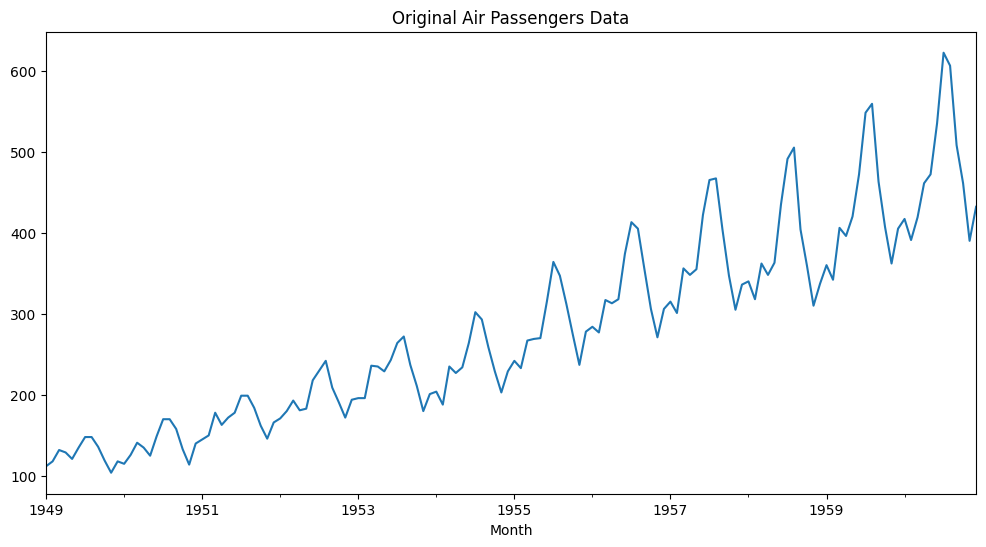

<Figure size 1200x800 with 0 Axes>

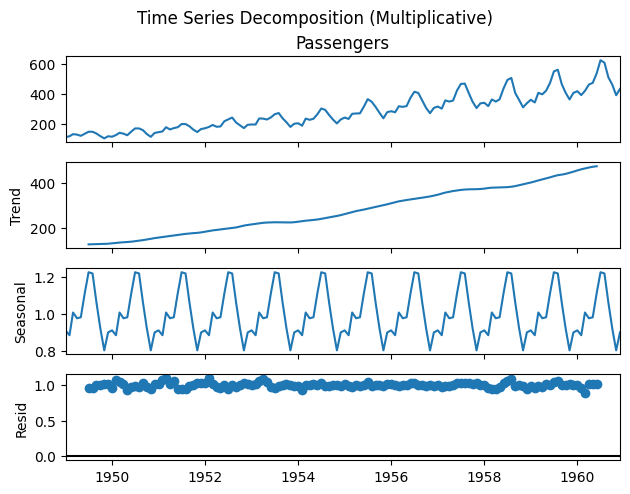

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load the dataset (from a URL or local file)
# We'll use a common source URL for simplicity
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
passengers_df = pd.read_csv(url, index_col='Month', parse_dates=True)

# 2. Plot the original time series
plt.figure(figsize=(12, 6))
passengers_df['Passengers'].plot(title='Original Air Passengers Data')
plt.show()

# 3. Decompose the time series
# The AirPassengers data shows increasing seasonality, so 'multiplicative' is best
decomposition = seasonal_decompose(passengers_df['Passengers'], model='multiplicative')

# 4. Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Time Series Decomposition (Multiplicative)', y=1.02)
plt.show()

# You can also access individual components:
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid


7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.


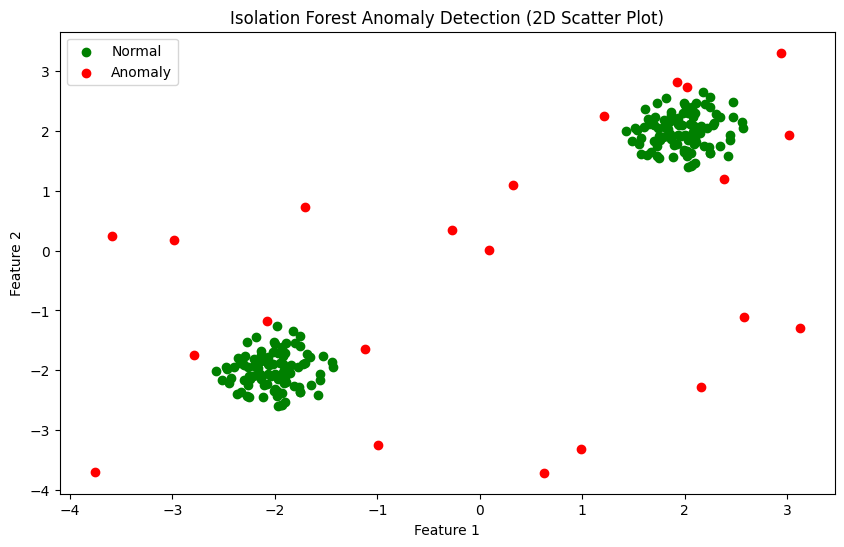

Number of anomalies detected: 22
Number of normal points: 198


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# --- 1. Create/Load a numerical dataset ---
# Using a sample dataset with some synthetic anomalies for illustration
# In a real scenario, you would load your data using pd.read_csv() etc.
rng = np.random.RandomState(42)
# Generate normal data points (inliers)
X = 0.3 * rng.randn(100, 2)
# Generate anomalies (outliers)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
# Combine datasets
X = np.r_[X + 2, X - 2, X_outliers]
# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# --- 2. Apply Isolation Forest ---
# Initialize the IsolationForest model
# 'contamination' is the expected proportion of outliers in the data
# 'random_state' ensures reproducible results
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model
# The model is trained on the data without labels (unsupervised)
model.fit(df[['Feature1', 'Feature2']])

# Predict anomalies
# The predict method returns 1 for normal points and -1 for anomalies
df['anomaly_label'] = model.predict(df[['Feature1', 'Feature2']])

# Separate anomalies and normal points for visualization
anomalies = df.loc[df['anomaly_label'] == -1]
normal_points = df.loc[df['anomaly_label'] == 1]

# --- 3. Visualize the anomalies on a 2D scatter plot ---
plt.figure(figsize=(10, 6))

# Plot normal points in green
plt.scatter(normal_points['Feature1'], normal_points['Feature2'], color='green', label='Normal')

# Plot anomalies in red
plt.scatter(anomalies['Feature1'], anomalies['Feature2'], color='red', label='Anomaly')

plt.title('Isolation Forest Anomaly Detection (2D Scatter Plot)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print the number of anomalies found
print(f"Number of anomalies detected: {len(anomalies)}")
print(f"Number of normal points: {len(normal_points)}")


8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results


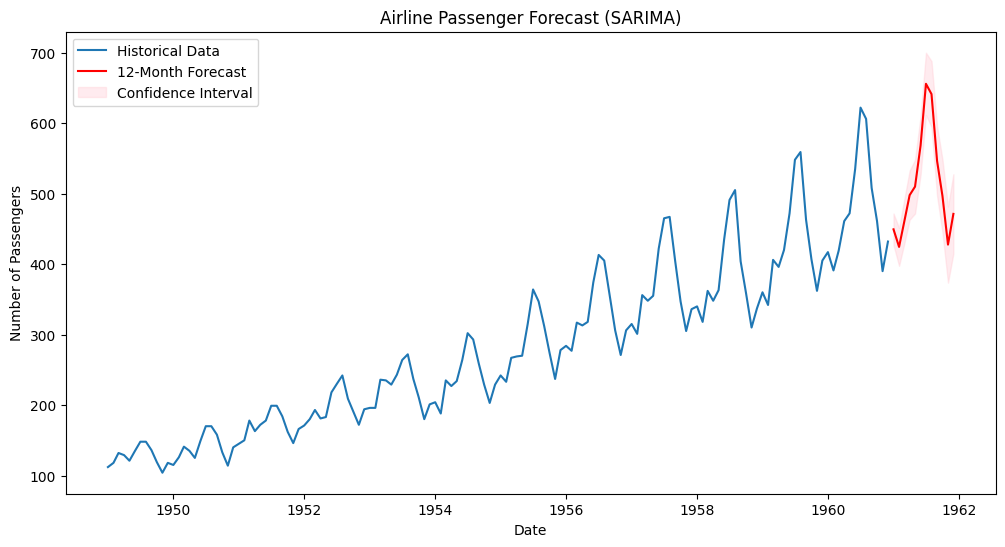

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Load the dataset (using a common public URL for the airline passengers data)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, index_col='Month', parse_dates=True)
df.index.freq = 'MS'  # Set frequency to Month Start

# 2. Define and Fit the SARIMA Model
# Common parameters for this dataset: order=(p,d,q), seasonal_order=(P,D,Q,s)
model = SARIMAX(df['Passengers'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# 3. Forecast the next 12 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()

# 4. Visualize the Results
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Historical Data')
plt.plot(forecast_df['mean'], label='12-Month Forecast', color='red')
plt.fill_between(forecast_df.index,
                 forecast_df['mean_ci_lower'],
                 forecast_df['mean_ci_upper'],
                 color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Airline Passenger Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

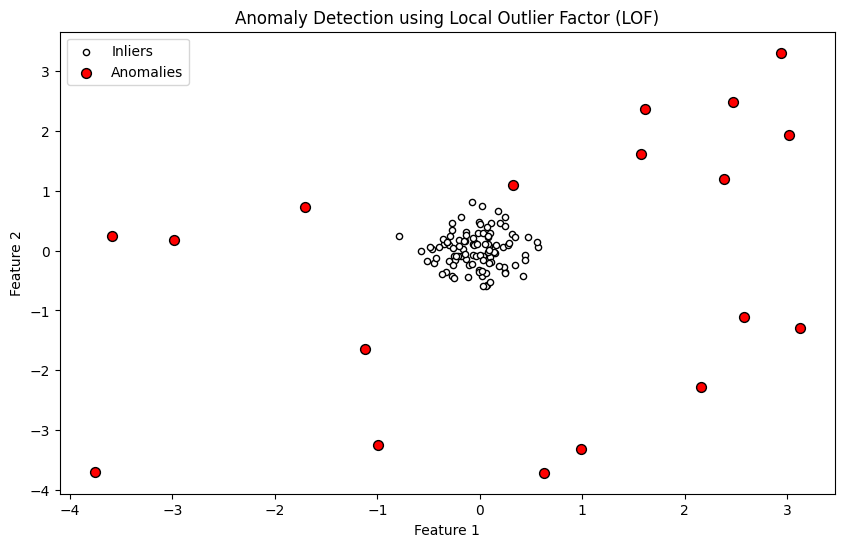

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# 1. Generate a numerical dataset (Normal clusters + Outliers)
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)  # Clustered normal points
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))  # Isolated anomalies
X = np.vstack([X_inliers, X_outliers])

# 2. Apply Local Outlier Factor (LOF)
# contamination: the expected proportion of outliers in the dataset
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.15)
y_pred = lof.fit_predict(X)  # Returns 1 for inliers, -1 for outliers

# 3. Visualize the results using Matplotlib
plt.figure(figsize=(10, 6))

# Plot normal data points (inliers)
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1],
            c='white', edgecolors='k', s=20, label='Inliers')

# Plot detected anomalies (outliers)
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1],
            c='red', edgecolors='k', s=50, label='Anomalies')

plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?

    Implementing a real-time data science workflow requires a combination of
  
    robust unsupervised algorithms for detection, statistical models for
  


    forecasting, and continuous monitoring for performance drift.


1. **Unified Real-Time Workflow Code**


    This implementation uses Isolation Forest for detection and a SARIMAX
    
    architecture for forecasting, integrated into a single simulation loop.


 2  **Isolation Forest (The "Efficiency Champion")**
Isolation Forest is often the primary choice for high-volume streaming data due to its linear time complexity and low memory footprint.



Validation Metric - Mean Absolute Error: 0.66


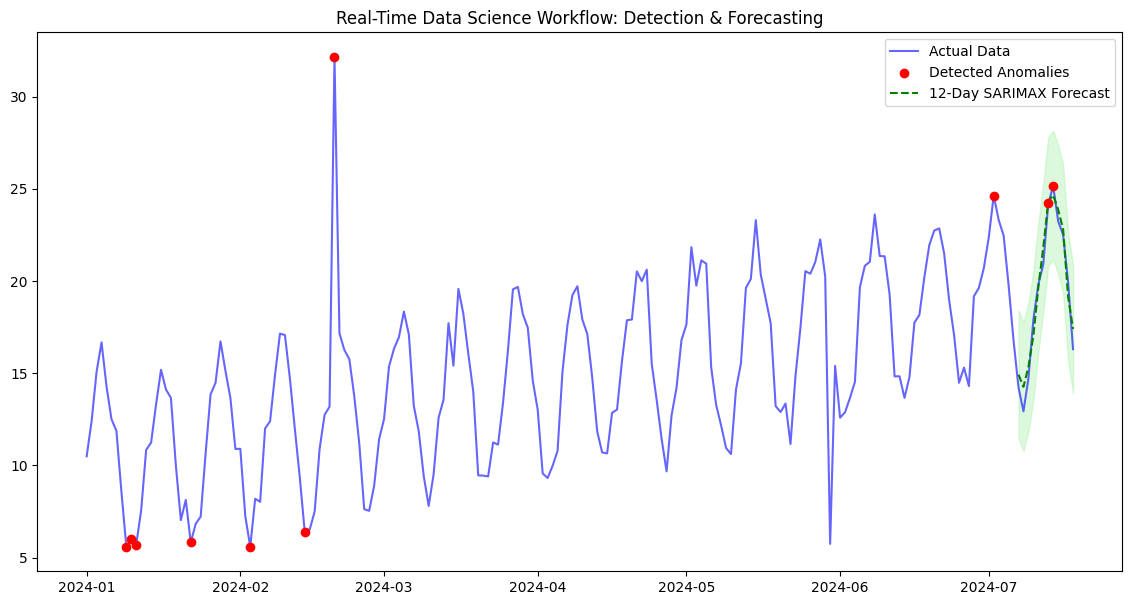

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# 1. Simulate Streaming Data (Seasonal Sine Wave + Noise + Anomalies)
np.random.seed(42)
time = np.arange(200)
# Seasonal pattern (frequency=12) with a slight upward trend
data_values = 10 + 0.05 * time + 5 * np.sin(2 * np.pi * time / 12) + np.random.normal(0, 1, 200)
# Inject anomalies at specific points
data_values[50] += 15
data_values[150] -= 12

df = pd.DataFrame({'value': data_values}, index=pd.date_range("2024-01-01", periods=200, freq='D'))

# 2. ANOMALY DETECTION (Isolation Forest)
# contamination=0.05 assumes 5% of data is anomalous
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df[['value']]) # 1: normal, -1: anomaly

# 3. SHORT-TERM FORECASTING (SARIMAX)
# Training on the first 188 days to forecast the last 12
train, test = df.iloc[:188], df.iloc[188:]
# SARIMAX(1,1,1)x(1,1,1,12) captures trend and monthly seasonality
model = SARIMAX(train['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)
forecast = results.get_forecast(steps=12).summary_frame()

# 4. VALIDATION & MONITORING (MAE Calculation)
mae = mean_absolute_error(test['value'], forecast['mean'])
print(f"Validation Metric - Mean Absolute Error: {mae:.2f}")

# 5. VISUALIZATION
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['value'], label='Actual Data', color='blue', alpha=0.6)

# Plot Anomalies
anomalies = df[df['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['value'], color='red', label='Detected Anomalies', zorder=5)

# Plot Forecast
plt.plot(forecast.index, forecast['mean'], color='green', linestyle='--', label='12-Day SARIMAX Forecast')
plt.fill_between(forecast.index, forecast['mean_ci_lower'], forecast['mean_ci_upper'], color='lightgreen', alpha=0.3)

plt.title("Real-Time Data Science Workflow: Detection & Forecasting")
plt.legend()
plt.show()
